In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter


In [63]:
from sqlalchemy import create_engine

# Define connection parameters
DRIVER_NAME = "ODBC Driver 17 for SQL Server"  # Use the correct driver
SERVER_NAME = "JoyalVivobook"
DATABASE_NAME = "employees_db"

# Create SQLAlchemy engine
engine = create_engine(f"mssql+pyodbc://{SERVER_NAME}/{DATABASE_NAME}?trusted_connection=yes&driver={DRIVER_NAME}")


In [64]:
# Query to get all table names
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"

# Fetch table names into Pandas DataFrame
tables_df = pd.read_sql(query, engine)

# Print the list of tables
print("Tables in the database:")
print(tables_df)

Tables in the database:
     TABLE_NAME
0   departments
1      dept_emp
2  dept_manager
3     employees
4      salaries
5        titles
6    final_data


In [65]:
# Fetch data into Pandas DataFrame
departments = pd.read_sql("SELECT * FROM departments", engine)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", engine)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", engine)
employees = pd.read_sql("SELECT * FROM employees", engine)
salaries = pd.read_sql("SELECT * FROM salaries", engine)
titles = pd.read_sql("SELECT * FROM titles", engine)

# Close the connection
engine.dispose()

In [66]:
dept_emp.dtypes

emp_no     object
dept_no    object
dtype: object

In [67]:
dept_emp['emp_no'].duplicated().sum()

31579

In [68]:
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [69]:
dept_manager.dtypes

dept_no    object
emp_no      int64
dtype: object

In [70]:
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,1,C,False,None
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,9,A,False,None
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,2,C,False,None
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,6,B,False,None


In [71]:
employees.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dtype: object

In [72]:
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [73]:
salaries.dtypes

emp_no    object
salary     int64
dtype: object

In [74]:
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [75]:
titles.dtypes

title_id    object
title       object
dtype: object

In [76]:
employees[employees['emp_no']==110022]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
59074,110022,m0001,1956-09-12,Margareta,Markovitch,M,1985-01-01,1,C,False,None


In [77]:
dept_manager[dept_manager['emp_no']==110022]

,dept_no,emp_no
0,d001,110022


In [78]:
#CHecking null values
employees.isnull().sum()

emp_no                          0
emp_title_id                    0
birth_date                      0
first_name                      0
last_name                       0
sex                             0
hire_date                       0
no_of_projects                  0
Last_performance_rating         0
left                            0
last_date                  270157
dtype: int64

In [79]:
employees['emp_no'].duplicated().sum()

0

In [80]:
#Joined tables
df1=pd.merge(left=employees,right=dept_emp,left_on='emp_no',right_on='emp_no',how='inner')

ValueError: You are trying to merge on int64 and object columns for key 'emp_no'. If you wish to proceed you should use pd.concat

In [81]:
dept_emp['emp_no']=dept_emp['emp_no'].astype(int)

In [82]:
dept_emp.dtypes

emp_no      int32
dept_no    object
dtype: object

In [83]:
employees.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dtype: object

In [84]:
#Joined tables
df1=pd.merge(left=employees,right=dept_emp,left_on='emp_no',right_on='emp_no',how='inner')

In [85]:
df1

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None,d002
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,1,C,False,None,d004
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,9,A,False,None,d004
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,2,C,False,None,d003
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,6,B,False,None,d006
...,...,...,...,...,...,...,...,...,...,...,...,...
331598,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,10,A,False,None,d004
331599,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,8,B,False,None,d007
331600,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,1,B,False,None,d002
331601,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,1,B,False,None,d007


In [86]:
df2=pd.merge(left=df1,right=titles,left_on='emp_title_id',right_on='title_id',how='inner')

In [87]:
df3=pd.merge(left=df2,right=salaries,on='emp_no',how='inner')

ValueError: You are trying to merge on int64 and object columns for key 'emp_no'. If you wish to proceed you should use pd.concat

In [88]:
salaries.dtypes

emp_no    object
salary     int64
dtype: object

In [89]:
salaries['emp_no']=salaries['emp_no'].astype(int)

In [90]:
df3=pd.merge(left=df2,right=salaries,on='emp_no',how='inner')

In [91]:
final_df=pd.merge(left=df3,right=departments,on='dept_no',how='inner')

In [92]:
final_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None,d002,s0001,Staff,40000,Finance
1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,None,d002,s0001,Staff,63016,Finance
2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,None,d002,s0001,Staff,60678,Finance
3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,None,d002,s0001,Staff,55963,Finance
4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,None,d002,s0001,Staff,40000,Finance


In [93]:
final_df.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dept_no                    object
title_id                   object
title                      object
salary                      int64
dept_name                  object
dtype: object

In [94]:
final_df.shape

(331603, 16)

In [95]:
final_df['hire_date']=pd.to_datetime(final_df['hire_date'],format='%Y-%m-%d')


In [96]:
final_df['birth_date']=pd.to_datetime(final_df['birth_date'],format='%Y-%m-%d')


In [97]:
final_df['last_date']=pd.to_datetime(final_df['last_date'],format='%Y-%m-%d')


In [98]:
reference_date=final_df['hire_date'].max()
final_df['tenure']=(reference_date-final_df['hire_date']).dt.days//365

In [99]:
reference_date=final_df['hire_date'].max()
final_df['age']=(reference_date-final_df['birth_date']).dt.days//365

In [100]:
final_df.columns

Index(['emp_no', 'emp_title_id', 'birth_date', 'first_name', 'last_name',
       'sex', 'hire_date', 'no_of_projects', 'Last_performance_rating', 'left',
       'last_date', 'dept_no', 'title_id', 'title', 'salary', 'dept_name',
       'tenure', 'age'],
      dtype='object')

In [101]:
final_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name,tenure,age
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,NaT,d002,s0001,Staff,40000,Finance,9,46
1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,NaT,d002,s0001,Staff,63016,Finance,6,36
2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,NaT,d002,s0001,Staff,60678,Finance,4,37
3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,NaT,d002,s0001,Staff,55963,Finance,5,47
4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,NaT,d002,s0001,Staff,40000,Finance,12,47


In [102]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   emp_no                   331603 non-null  int64         
 1   emp_title_id             331603 non-null  object        
 2   birth_date               331603 non-null  datetime64[ns]
 3   first_name               331603 non-null  object        
 4   last_name                331603 non-null  object        
 5   sex                      331603 non-null  object        
 6   hire_date                331603 non-null  datetime64[ns]
 7   no_of_projects           331603 non-null  int64         
 8   Last_performance_rating  331603 non-null  object        
 9   left                     331603 non-null  bool          
 10  last_date                33021 non-null   datetime64[ns]
 11  dept_no                  331603 non-null  object        
 12  title_id        

In [103]:
final_df.to_csv("output.csv", index=False)

## Classify employee as Left or not left

In [23]:
# 📌 Load dataset 
final_df = pd.read_csv("output.csv")  

final_df=final_df.drop_duplicates(subset='emp_no',keep='first')

In [24]:
final_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name,tenure
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,NaN,d002,s0001,Staff,40000,Finance,9
1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,NaN,d002,s0001,Staff,63016,Finance,6
2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,NaN,d002,s0001,Staff,60678,Finance,4
3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,NaN,d002,s0001,Staff,55963,Finance,5
4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,NaN,d002,s0001,Staff,40000,Finance,12


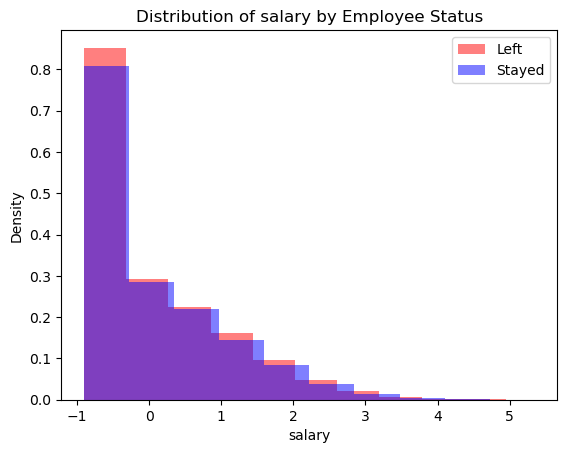

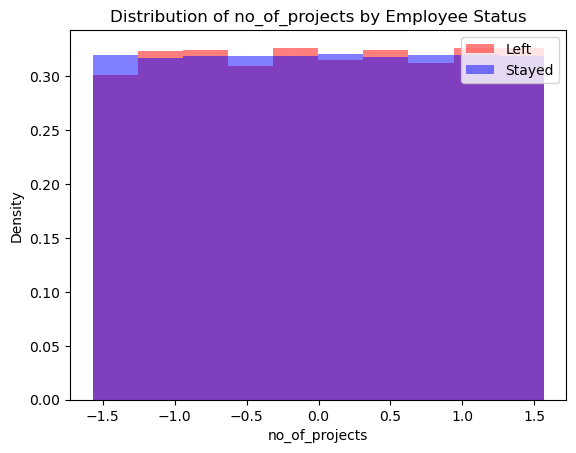

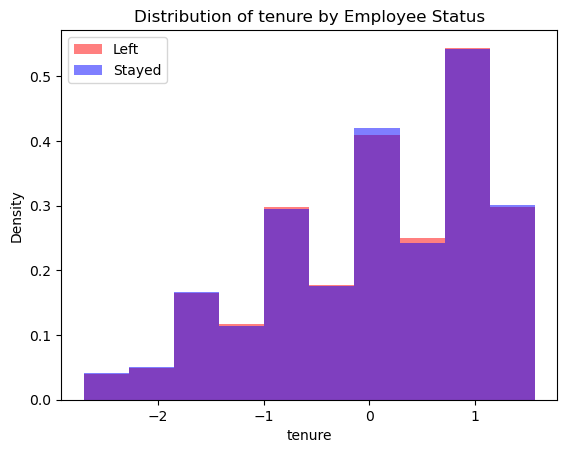

In [27]:
for label in final_df.select_dtypes(include=['number']).columns:  # Only numeric columns
    plt.hist(final_df[final_df['left'] == True][label], color='red', alpha=0.5, density=True, label='Left')
    plt.hist(final_df[final_df['left'] == False][label], color='blue', alpha=0.5, density=True, label='Stayed')
    plt.xlabel(label)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Distribution of {label} by Employee Status")
    plt.show()


In [48]:
min_value = final_df['salary'].min()
max_value = final_df['salary'].max()

print(f"Min: {min_value}, Max: {max_value}, Range: {max_value - min_value}")


Min: 40000, Max: 129492, Range: 89492


In [49]:
min_value = final_df['age'].min()
max_value = final_df['age'].max()

print(f"Min: {min_value}, Max: {max_value}, Range: {max_value - min_value}")


Min: 35, Max: 48, Range: 13


In [57]:
min_value = final_df['tenure'].min()
max_value = final_df['tenure'].max()

print(f"Min: {min_value}, Max: {max_value}, Range: {max_value - min_value}")


Min: 0, Max: 15, Range: 15


In [ ]:
final_df = pd.read_csv("output.csv")  

# Define bins
salary_bins = [40000, 60000, 80000, 100000, 129492]
age_bins = [35, 39, 43, 48]
tenure_bins = [0, 2, 5, 10, 15]

# Apply binning
final_df['salary_group'] = pd.cut(final_df['salary'], bins=salary_bins, include_lowest=True, right=True)
final_df['age_group'] = pd.cut(final_df['age'], bins=age_bins, include_lowest=True, right=True)
final_df['tenure_group'] = pd.cut(final_df['tenure'], bins=tenure_bins, include_lowest=True, right=True)



### Logistic regression with pd.get_dummies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# 📌 Load dataset (assuming already loaded as final_df)
# final_df = final_df.drop_duplicates(subset='emp_no', keep='first')

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['sex', 'title', 'Last_performance_rating', 'salary_group', 'age_group', 'tenure_group']
numerical_cols = ['no_of_projects']  # Only remaining numerical column
target = 'left'

# Drop original numerical columns and keep only required ones
final_df = final_df.drop(columns=['salary', 'age', 'tenure'])
final_df = final_df[categorical_cols + numerical_cols + [target]]

# ✅ Encoding categorical variables using pd.get_dummies()
final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)

# ✅ Standardizing remaining numerical features
scaler = StandardScaler()
final_df[numerical_cols] = scaler.fit_transform(final_df[numerical_cols])

# ✅ Separating features and target variable
X = final_df.drop(columns=[target])  # Features
y = final_df[target].astype(int)  # Target variable (0 = stayed, 1 = left)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 3️⃣ Apply Random Oversampling to Handle Class Imbalance ==================
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ================== 4️⃣ Model Training with Logistic Regression ==================
clf = LogisticRegression(solver='saga', class_weight='balanced', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5138

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.52      0.66     59717
           1       0.10      0.49      0.17      6604

    accuracy                           0.51     66321
   macro avg       0.50      0.50      0.41     66321
weighted avg       0.82      0.51      0.61     66321


Confusion Matrix:
 [[30857 28860]
 [ 3384  3220]]


In [30]:
import pandas as pd
import numpy as np

# ================== Feature Importance Extraction ==================
# Assuming `clf` is a trained LogisticRegression model
feature_names = X.columns
coefficients = clf.coef_[0]  # Coefficients for binary classification

# Create a DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Absolute_Coefficient': np.abs(coefficients)  # For ranking by magnitude
})

# Sort by absolute coefficient to see most influential features
feature_importance = feature_importance.sort_values(by='Absolute_Coefficient', ascending=False)

# Display feature importance
print("\nFeature Importance (sorted by absolute coefficient):")
print(feature_importance)



Feature Importance (sorted by absolute coefficient):
                        Feature  Coefficient  Absolute_Coefficient
4                 title_Manager     0.259286              0.259286
8        title_Technique Leader     0.062336              0.062336
7                   title_Staff     0.060318              0.060318
5         title_Senior Engineer     0.056556              0.056556
3                title_Engineer     0.051215              0.051215
6            title_Senior Staff     0.031588              0.031588
0                        salary    -0.018208              0.018208
1                no_of_projects     0.013853              0.013853
9     Last_performance_rating_B    -0.008169              0.008169
11  Last_performance_rating_PIP     0.006188              0.006188
12    Last_performance_rating_S     0.003732              0.003732
10    Last_performance_rating_C     0.001636              0.001636
2                        tenure    -0.001171              0.001171


### Logistic regression Onehot encoding - Predict if employee has left the company or not

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.compose import ColumnTransformer

# 📌 Load dataset 
final_df = pd.read_csv("output.csv") 

# ================== 1️⃣ Data Preprocessing (Keeping Multiple Rows) ==================
# Define categorical & numerical features
categorical_cols = ['dept_name', 'title', 'Last_performance_rating']
numerical_cols = ['salary', 'no_of_projects','tenure']

# ✅ Applying OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

# Use ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', scaler, numerical_cols),
    ('cat', encoder, categorical_cols)
])

X = final_df.drop(columns=['left'])  # Features
y = final_df['left'].astype(int)  # Target variable (0 = stayed, 1 = left)

# Transform features
X_transformed = preprocessor.fit_transform(X)

# Convert transformed array back to DataFrame
encoded_feature_names = preprocessor.get_feature_names_out()
X = pd.DataFrame(X_transformed, columns=encoded_feature_names)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 3️⃣ Apply Random Oversampling to Handle Class Imbalance ==================
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ================== 4️⃣ Model Training with Logistic Regression ==================
clf = LogisticRegression(solver='saga', class_weight='balanced', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5026

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.50      0.65     59717
           1       0.10      0.49      0.16      6604

    accuracy                           0.50     66321
   macro avg       0.50      0.50      0.41     66321
weighted avg       0.82      0.50      0.60     66321


Confusion Matrix:
 [[30101 29616]
 [ 3369  3235]]


### XGBOOST with onehot encoder - Predict if employee has left the company or not

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# 📌 Load dataset 
final_df = pd.read_csv("output.csv") 

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['dept_name', 'title', 'Last_performance_rating']
numerical_cols = ['salary', 'no_of_projects','tenure']
target = 'left'

# Keep only the required columns
final_df = final_df[categorical_cols + numerical_cols + [target]]

# ✅ One-hot encoding categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(final_df[categorical_cols])
encoded_cat_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# ✅ Standardizing numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(final_df[numerical_cols])
scaled_num_df = pd.DataFrame(scaled_nums, columns=numerical_cols)

# ✅ Concatenating all features
X = pd.concat([encoded_cat_df, scaled_num_df], axis=1)
y = final_df['left'].astype(int)  # Convert boolean to int (0 = stayed, 1 = left)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 3️⃣ Apply SMOTE to Handle Class Imbalance ==================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ================== 4️⃣ Model Training with XGBoost ==================
# Calculate scale_pos_weight for XGBoost
scale_pos_weight = len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1])

# Train XGBoost model
clf = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)
clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

ValueError: feature_names must be string, and may not contain [, ] or <

### Random Forest

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# 📌 Load dataset 
final_df = pd.read_csv("output.csv") 

# ================== 1️⃣ Data Preprocessing (Keeping Multiple Rows) ==================
# Define categorical & numerical features
categorical_cols = ['dept_name', 'title', 'Last_performance_rating']
numerical_cols = ['salary', 'no_of_projects','tenure']

# ✅ Applying OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

# Use ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', scaler, numerical_cols),
    ('cat', encoder, categorical_cols)
])

X = final_df.drop(columns=['left'])  # Features
y = final_df['left'].astype(int)  # Target variable (0 = stayed, 1 = left)

# Transform features
X_transformed = preprocessor.fit_transform(X)

# Convert transformed array back to DataFrame
encoded_feature_names = preprocessor.get_feature_names_out()
X = pd.DataFrame(X_transformed, columns=encoded_feature_names)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 3️⃣ Apply SMOTE to Handle Class Imbalance ==================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ================== 4️⃣ Model Training with Random Forest ==================
rf_clf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = rf_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7733

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87     59717
           1       0.10      0.17      0.13      6604

    accuracy                           0.77     66321
   macro avg       0.50      0.50      0.50     66321
weighted avg       0.82      0.77      0.80     66321


Confusion Matrix:
 [[50195  9522]
 [ 5514  1090]]


### KNN algorithm

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer

# 📌 Load dataset 
final_df = pd.read_csv("output.csv") 

# ================== 1️⃣ Data Preprocessing ==================
# Define categorical & numerical features
categorical_cols = ['dept_name', 'title', 'Last_performance_rating']
numerical_cols = ['salary', 'no_of_projects','tenure']

# ✅ Applying OneHotEncoder & StandardScaler
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

# Use ColumnTransformer to apply transformations
preprocessor = ColumnTransformer([
    ('num', scaler, numerical_cols),
    ('cat', encoder, categorical_cols)
])

X = final_df.drop(columns=['left'])  # Features
y = final_df['left'].astype(int)  # Target variable (0 = stayed, 1 = left)

# Transform features & convert to NumPy array
X_transformed = preprocessor.fit_transform(X)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42, stratify=y)

# Convert to NumPy array (Fix for the error)
X_train = np.array(X_train)
X_test = np.array(X_test)

# ================== 3️⃣ Apply SMOTE to Handle Class Imbalance ==================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# ================== 4️⃣ Model Training with K-Nearest Neighbors ==================
knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')  # Using 5 neighbors
knn_clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = knn_clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7249

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84     59717
           1       0.10      0.21      0.13      6604

    accuracy                           0.72     66321
   macro avg       0.50      0.50      0.49     66321
weighted avg       0.82      0.72      0.77     66321


Confusion Matrix:
 [[46667 13050]
 [ 5192  1412]]


## ANN algoritm

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 📌 Load dataset 
final_df = pd.read_csv("output.csv")  

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['dept_name', 'title', 'Last_performance_rating']
numerical_cols = ['salary', 'no_of_projects', 'tenure']
target = 'left'

final_df = final_df[categorical_cols + numerical_cols + [target]]
final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)
scaler = StandardScaler()
final_df[numerical_cols] = scaler.fit_transform(final_df[numerical_cols])

X = final_df.drop(columns=[target])
y = final_df[target].astype(int)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 3️⃣ Apply Random Oversampling ==================
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ✅ Check class balance after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# ================== 4️⃣ Build and Train ANN Model ==================
model = Sequential([
    tf.keras.layers.Input(shape=(X_train_resampled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Adjusted class weights (less aggressive)
class_weight = {0: 1.0, 1: 5.0}  # Try 1:5 instead of 1:9

# Train for 3 epochs
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=3, 
                    batch_size=32, 
                    validation_split=0.2, 
                    class_weight=class_weight, 
                    verbose=1)

# ================== 5️⃣ Model Evaluation ==================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Class distribution after oversampling:
left
0    238865
1    238865
Name: count, dtype: int64
Epoch 1/3
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.3730 - loss: 1.4142 - val_accuracy: 1.0000 - val_loss: 0.2970
Epoch 2/3
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.3761 - loss: 1.4063 - val_accuracy: 1.0000 - val_loss: 0.2876
Epoch 3/3
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - accuracy: 0.3733 - loss: 1.4060 - val_accuracy: 1.0000 - val_loss: 0.3008
2073/2073 ━━━━━━━━━━━━━━━━━━━━ 2s 906us/step
Accuracy: 0.0996

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     59717
           1       0.10      1.00      0.18      6604

    accuracy                           0.10     66321
   macro avg       0.05      0.50      0.09     66321
weighted avg       0.01      0.10      0.02     66321


Confusion Matrix:
 [[    0 59717]
 [    0  6604]]


c:\Users\Joyal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joyal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Joyal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline supporting SMOTE
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 📌 Load dataset 
final_df = pd.read_csv("output.csv")

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['dept_name', 'title', 'Last_performance_rating']
numerical_cols = ['salary', 'no_of_projects', 'tenure']
target = 'left'

# Keep only the required columns
final_df = final_df[categorical_cols + numerical_cols + [target]]

X = final_df.drop(columns=[target])  # Features
y = final_df[target].astype(int)  # Target (Convert to int: 0 = stayed, 1 = left)

# Store feature order before transformation
feature_order = X.columns.tolist()

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 3️⃣ Define Preprocessing Pipeline ==================
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# ================== 4️⃣ Define Full Pipeline with SMOTE & XGBoost ==================
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  
    ('classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# ================== 5️⃣ Train Model ==================
pipeline.fit(X_train, y_train)

# ✅ Store feature order inside pipeline
pipeline.feature_order = feature_order  # Ensure this is saved!

# ✅ Save the trained pipeline
joblib.dump(pipeline, "model_pipeline.pkl")

print("✅ Model training complete. Pipeline saved as 'model_pipeline.pkl'.")


✅ Model training complete. Pipeline saved as 'model_pipeline.pkl'.


In [27]:
final_df = pd.read_csv("output.csv")

# Take a random sample of 1000 rows
random_1000_rows = final_df.sample(n=1000, random_state=42)

# Save to CSV
random_1000_rows.to_csv("random_1000_rows.csv", index=False)

print("Random 100 rows saved successfully!")

Random 100 rows saved successfully!


In [28]:
# ✅ Load model
pipeline = joblib.load("model_pipeline.pkl")

# ✅ Load new data and reorder columns
new_data = pd.read_csv("random_1000_rows.csv")
new_data = new_data[pipeline.feature_order]  # Ensure correct column order

# ✅ Make predictions
predictions = pipeline.predict(new_data)
print(predictions)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [2]:
import pandas as pd
final_df = pd.read_csv("output.csv")

In [3]:
final_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name,tenure
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,NaN,d002,s0001,Staff,40000,Finance,9
1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,NaN,d002,s0001,Staff,63016,Finance,6
2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,NaN,d002,s0001,Staff,60678,Finance,4
3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,NaN,d002,s0001,Staff,55963,Finance,5
4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,NaN,d002,s0001,Staff,40000,Finance,12
